<a href="https://colab.research.google.com/github/Shayee0778/Hamoye-Lesson-1/blob/main/Classification_Hamoye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
#read_dataset
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [94]:
#check the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [95]:
#check missing details in the dataset
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [96]:
#check if dataset has duplicate values
df.duplicated().sum()

0

In [97]:
#change the datatype for TotalCharge column from object to number
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].dtypes

dtype('float64')

In [98]:
#fill missing values in TotalCharge column with 0
df['TotalCharges'].fillna(0, inplace=True)

assert df['TotalCharges'].isna().sum() == 0


In [99]:
#create a dictionary to map Churn value
churn_val = {'No': 0 , 'Yes': 1}

df['Churn'] = df['Churn'].map(churn_val)
df['Churn'].unique()

array([0, 1])

In [100]:
#assign all column expect Churn to X an Churn clumn to y
X = df.drop('Churn', axis=1)
y = df['Churn']

In [101]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [102]:
#split dataset to train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state =1,  test_size = 0.2)

In [103]:
#create list for categorical and numeric features
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod']
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [104]:
#subset the categorical and numerical feature on both x_train and x_test
x_train_cat = x_train[categorical]
x_test_cat = x_test[categorical]



x_train_num = x_train[numerical]
x_test_num = x_test[numerical]

In [105]:
#standardized the numerical feature of both x_train and x_test
scaler = StandardScaler()
X_train_num_scaled = pd.DataFrame(scaler.fit_transform(x_train_num), columns=x_train_num.columns)
X_test_num_scaled = pd.DataFrame(scaler.transform(x_test_num), columns=x_train_num.columns)

assert X_train_num_scaled.columns.to_list() == ['tenure', 'MonthlyCharges', 'TotalCharges']

In [106]:
x_train_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
1814,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
5946,Female,0,No,No,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic)
3881,Male,0,Yes,No,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic)
2389,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check
3676,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check


In [107]:
#initialize onehot encoder, train it with categorical columns and create a list of column that will be generated
ohe = OneHotEncoder(sparse_output=False).fit(x_train_cat)
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(x_train_cat.columns) for cat in ohe.categories_[i]]
categorical_columns

['gender_Female',
 'gender_Male',
 'SeniorCitizen_0',
 'SeniorCitizen_1',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'Paym

In [108]:
#apply one hot encode on x_train and x_test
x_train_cat_ohe = pd.DataFrame(ohe.transform(x_train_cat), columns=categorical_columns)
x_test_cat_ohe = pd.DataFrame(ohe.fit_transform(x_test_cat), columns=categorical_columns)


In [109]:
#concatenate scaled numerical featured and categorical features that are one hot encoded
X_train_final = pd.concat([X_train_num_scaled, x_train_cat_ohe], axis=1)
X_test_final = pd.concat([X_test_num_scaled, x_test_cat_ohe], axis=1)


In [110]:
X_train_final.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.825884,-1.497530,-0.890947,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.395961,0.302996,0.389693,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.577078,0.012320,1.060945,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.577078,0.686687,1.775397,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.092777,0.186726,-0.102671,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [111]:
#create a function that is capable of training a model, testing the model and printing out accuracy score
def train_model(model, model_name):
  model.fit(X_train_final, y_train)
  model_pred = model.predict(X_test_final)
  print(f'The accuracy score for {model_name} is {accuracy_score(y_test, model_pred)}')

In [112]:
#use the model on random forest, extra trees, xgboost and light gbm
train_model(RandomForestClassifier(random_state = 1), "Random Forest")
train_model(ExtraTreesClassifier(random_state = 1), "Extra Tree")
train_model(xgb.XGBClassifier(random_state = 1), "XGBoost")
train_model(lgbm.LGBMClassifier(random_state = 1), "Light GBM")

The accuracy score for Random Forest is 0.7913413768630234
The accuracy score for Extra Tree is 0.7672107877927609
The accuracy score for XGBoost is 0.7934705464868701
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1521, number of negative: 4113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.269968 -> initscore=-0.994785
[LightGBM] [Info] Start training from score -0.994785
The accuracy score for Light GBM is 0.8034066713981547


In [113]:
#creatung values that will be used for hyperparameter tuning
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [114]:
# do hyperparameter tuning on extra tree classifier using random search cv

# build a classifier
clf = ExtraTreesClassifier(random_state = 1)
# Randomized search
random_search = RandomizedSearchCV(clf, param_distributions=hyperparameter_grid, n_iter=10, cv=5,  scoring = 'accuracy', n_jobs = -1, verbose = 1 , random_state = 1)
random_search.fit(X_train_final, y_train)
print(random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 1000, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': 'sqrt'}


In [115]:
#training extra tree with parameter that gives the best result
best_model = ExtraTreesClassifier(random_state = 1, n_estimators= 1000, min_samples_split = 9, min_samples_leaf = 8,max_features= 'sqrt')
best_model.fit(X_train_final, y_train)
accuracy_score(y_test, best_model.predict(X_test_final))

0.8041163946061036

In [116]:
#feature importance
feature_importance = best_model.feature_importances_
feature_importance

array([0.09280047, 0.01492623, 0.04771397, 0.01065307, 0.01033262,
       0.00686424, 0.00714407, 0.00855604, 0.00896891, 0.00504508,
       0.00501079, 0.00317177, 0.00310987, 0.00829134, 0.00310918,
       0.00828334, 0.03268689, 0.06528743, 0.00681595, 0.07499757,
       0.00793063, 0.02169984, 0.03007741, 0.00899164, 0.01259782,
       0.01685725, 0.00618396, 0.00745443, 0.0641409 , 0.00683073,
       0.01455862, 0.00817886, 0.00743675, 0.00828469, 0.00887974,
       0.0056501 , 0.00929173, 0.15223652, 0.0285427 , 0.05442309,
       0.01188317, 0.01177935, 0.00698283, 0.00860032, 0.05166596,
       0.00507212])

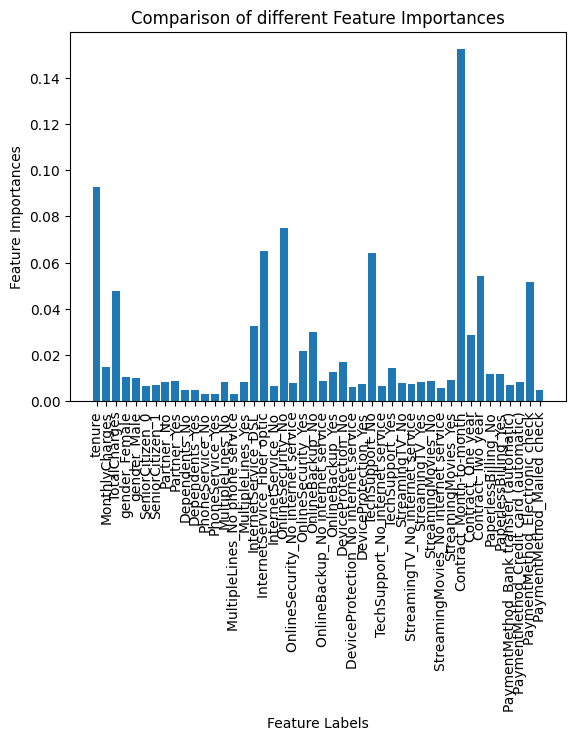

In [117]:
#plot feature importance
plt.bar(X_train_final.columns, feature_importance)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.xticks(rotation=90)
plt.show()